<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Data_Visualization_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

data=pd.read_csv('/content/drive/My Drive/Handled_data.csv')

In [0]:
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [0]:
airline_counts=dict(data.groupby('AIRLINE').size())
airline_counts

{'AA': 712935,
 'AS': 171439,
 'B6': 262042,
 'DL': 870275,
 'EV': 554752,
 'F9': 90090,
 'HA': 76041,
 'MQ': 278791,
 'NK': 115193,
 'OO': 576814,
 'UA': 507762,
 'US': 194223,
 'VX': 61248,
 'WN': 1242403}

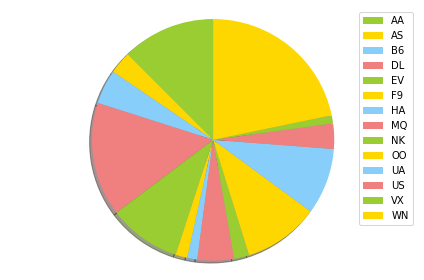

In [0]:
import matplotlib.pyplot as plt

labels = airline_counts.keys()
sizes = airline_counts.values()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
import operator
ordered=dict(sorted(airline_counts.items(), key=operator.itemgetter(1),reverse=True))

In [0]:
len(ordered)

14

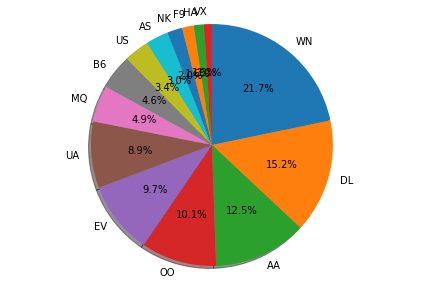

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

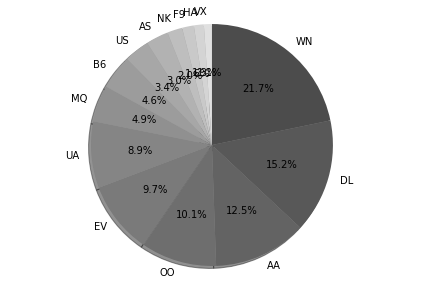

In [0]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

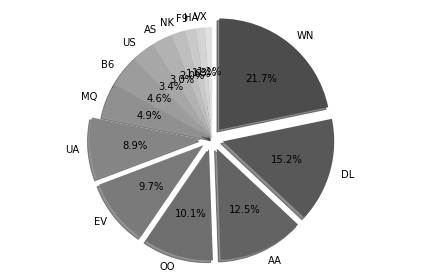

In [0]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot

plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
import numpy as np
from itertools import islice

def indices_to_merge(dic,cut_off_percent):
  sum=0;cumm_per=0;cummulative_percent=[]
  for key in dic.keys():
    sum=sum+dic[key]
  values=list(dic.values())
  percent_of_outcome=(values/sum)*100
  percent_of_outcome=[round(elem,1) for elem in percent_of_outcome]
  print(percent_of_outcome)
  for percent in percent_of_outcome:
    cumm_per=cumm_per+percent
    cummulative_percent.append(cumm_per)
  print(cummulative_percent)
  return [i for i in range(len(cummulative_percent)) if cummulative_percent[i] > cut_off_percent]

def merge_indices(dic,ind):
  sum=0
  values=list(dic.values())
  print(values)
  sel_values=values[ind[0]:]
  for elem in sel_values:
    sum=sum+elem
  print(sum)
  delete_indices(dic,ind)
  dic['other']=sum
  print(dic)

def delete_indices(dic,indices):
  i = 0
  keys_to_delete = []
  for key in dic.keys():
      if i in indices:
          print(key)
          keys_to_delete.append(key)
      i = i + 1

  for key in keys_to_delete:
      if key in dic:
          del dic[key]

merge_indices(ordered,indices_to_merge(ordered,94))

[21.7, 15.2, 12.5, 10.1, 9.7, 8.9, 4.9, 4.6, 3.4, 3.0, 2.0, 1.6, 1.3, 1.1]
[21.7, 36.9, 49.4, 59.5, 69.2, 78.10000000000001, 83.00000000000001, 87.60000000000001, 91.00000000000001, 94.00000000000001, 96.00000000000001, 97.60000000000001, 98.9, 100.0]
[1242403, 870275, 712935, 576814, 554752, 507762, 278791, 262042, 194223, 171439, 115193, 90090, 76041, 61248]
514011
AS
NK
F9
HA
VX
{'WN': 1242403, 'DL': 870275, 'AA': 712935, 'OO': 576814, 'EV': 554752, 'UA': 507762, 'MQ': 278791, 'B6': 262042, 'US': 194223, 'other': 514011}


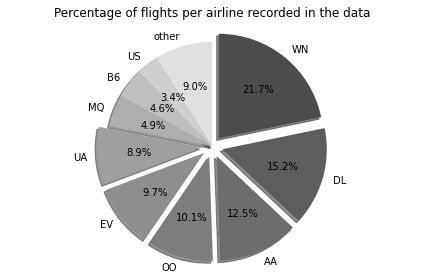

In [0]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot
plt.title("Percentage of flights per airline recorded in the data")
plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

In [0]:
data=data.assign(dep_del_15=(data.DEPARTURE_DELAY>14).astype(int))
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,dep_del_15
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0


In [0]:
data=data.assign(outcome=(data.DEPARTURE_DELAY>4).astype(int))
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,dep_del_15,outcome
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0


In [0]:
data.dep_del_15.mean()

0.18383278427331567

In [0]:
data.DEPARTURE_DELAY.mean()

9.29484190431655

In [0]:
data.ARRIVAL_DELAY.mean()

4.407057357987598

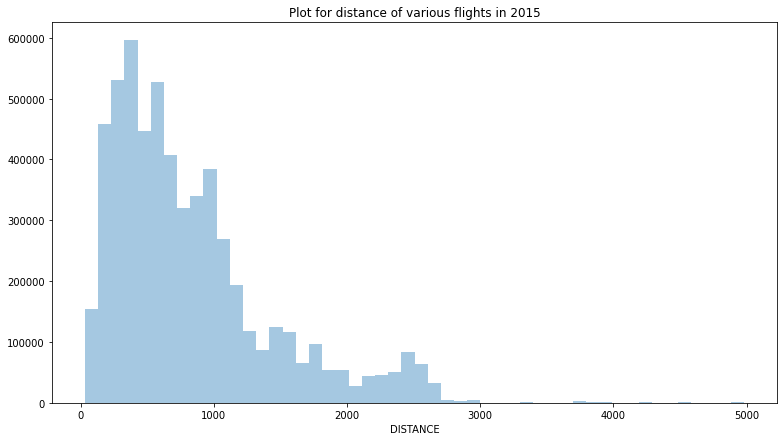

In [0]:
plt.figure(figsize=(13,7))
plt.title("Plot for distance of various flights in 2015")
sns.distplot(data['DISTANCE'],kde=False)

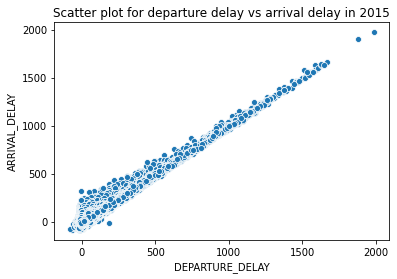

In [0]:
plt.title("Scatter plot for departure delay vs arrival delay in 2015")
sns.scatterplot(data.DEPARTURE_DELAY,data.ARRIVAL_DELAY)

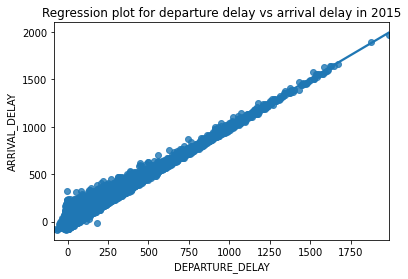

In [0]:
plt.title("Regression plot for departure delay vs arrival delay in 2015")
sns.regplot(data.DEPARTURE_DELAY,data.ARRIVAL_DELAY)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


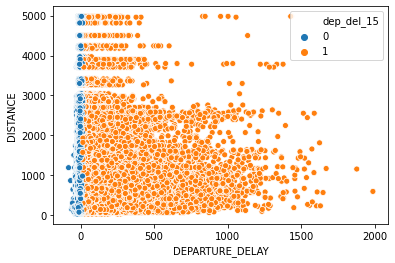

In [0]:
sns.scatterplot(data.DEPARTURE_DELAY,data.DISTANCE,hue=data.dep_del_15)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


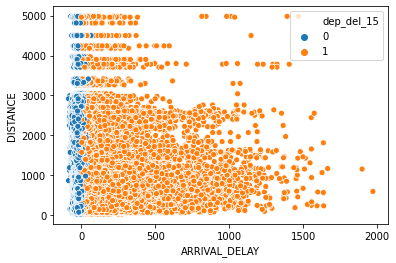

In [0]:
sns.scatterplot(data.ARRIVAL_DELAY,data.DISTANCE,hue=data.dep_del_15)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


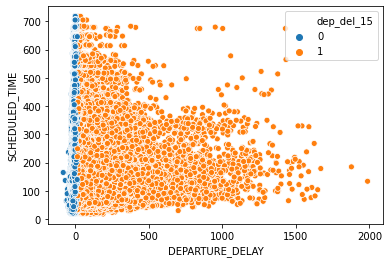

In [0]:
sns.scatterplot(data.DEPARTURE_DELAY,data.SCHEDULED_TIME,hue=data.dep_del_15)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


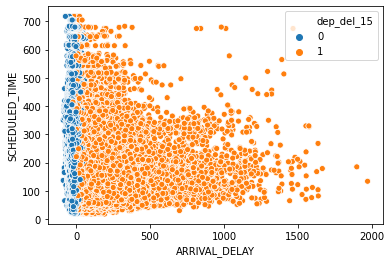

In [0]:
sns.scatterplot(data.ARRIVAL_DELAY,data.SCHEDULED_TIME,hue=data.dep_del_15)

In [0]:
sam=data[['MONTH','AIRLINE','DEPARTURE_DELAY']]
sam

,MONTH,AIRLINE,DEPARTURE_DELAY
0,1,AS,-11.0
1,1,AA,-8.0
2,1,US,-2.0
3,1,AA,-5.0
4,1,AS,-1.0
...,...,...,...
5714003,12,B6,-4.0
5714004,12,B6,-4.0
5714005,12,B6,-9.0
5714006,12,B6,-6.0


In [0]:
df=sam.groupby(['MONTH','AIRLINE']).mean()
df

DEPARTURE_DELAY
MONTH AIRLINE                 
1     AA             10.548335
      AS              3.072086
      B6              9.988331
      DL              5.888215
      EV              9.678895
...                        ...
12    NK             14.311945
      OO             12.699417
      UA             17.745758
      VX             18.382633
      WN             12.855924

[162 rows x 1 columns]

In [0]:
df=df.reset_index()
df

,MONTH,AIRLINE,DEPARTURE_DELAY
0,1,AA,10.548335
1,1,AS,3.072086
2,1,B6,9.988331
3,1,DL,5.888215
4,1,EV,9.678895
...,...,...,...
157,12,NK,14.311945
158,12,OO,12.699417
159,12,UA,17.745758
160,12,VX,18.382633


In [0]:
import pandas as pd

df=df.join(pd.get_dummies(df.AIRLINE))
df.drop('AIRLINE',inplace=True,axis=1)
df

,MONTH,DEPARTURE_DELAY,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,10.548335,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3.072086,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,9.988331,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,5.888215,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,9.678895,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,12,14.311945,0,0,0,0,0,0,0,0,1,0,0,0,0,0
158,12,12.699417,0,0,0,0,0,0,0,0,0,1,0,0,0,0
159,12,17.745758,0,0,0,0,0,0,0,0,0,0,1,0,0,0
160,12,18.382633,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
cols=(df.columns).drop(['MONTH','DEPARTURE_DELAY'])
for col in cols:
  df[col]=df.DEPARTURE_DELAY*df[col]
df

,MONTH,DEPARTURE_DELAY,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,10.548335,10.548335,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,3.072086,0.000000,3.072086,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1,9.988331,0.000000,0.000000,9.988331,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1,5.888215,0.000000,0.000000,0.000000,5.888215,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,1,9.678895,0.000000,0.000000,0.000000,0.000000,9.678895,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,12,14.311945,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.311945,0.000000,0.000000,0.0,0.000000,0.000000
158,12,12.699417,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.699417,0.000000,0.0,0.000000,0.000000
159,12,17.745758,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,17.745758,0.0,0.000000,0.000000
160,12,18.382633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.382633,0.000000


In [0]:
df=df.drop('DEPARTURE_DELAY',axis=1)
df=df.groupby('MONTH').sum()
df

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
MONTH,,,,,,,,,,,,,,
1,10.548335,3.072086,9.988331,5.888215,9.678895,17.910765,1.311954,15.995865,13.073100,11.999957,13.885555,5.175011,6.896277,9.453426
2,10.053497,2.613568,19.492738,12.088996,11.137769,25.620629,2.575437,18.307455,16.809932,10.903107,14.834584,9.039882,12.435619,9.814256
3,11.063164,3.007749,15.044718,8.324609,8.817253,19.873837,0.828408,12.117719,12.589259,5.826459,13.793637,5.886201,10.475813,10.073671
4,10.468345,-0.036514,8.213890,6.155252,6.596302,11.562324,-2.216647,8.671830,9.873394,5.280338,12.791827,4.481628,5.622549,8.799611
5,10.985531,-0.247723,7.003266,7.436505,9.963432,11.251146,-1.375662,9.447081,23.524898,5.983105,14.589641,3.985411,10.734360,11.805389
6,14.095703,1.911845,11.319878,10.836347,15.052954,19.023547,-1.217169,12.977325,36.055550,10.104917,24.237770,8.243973,8.705185,15.903023
7,9.688667,2.451084,11.239188,8.229070,9.004684,13.852202,0.684977,8.976380,16.351598,8.801541,19.348397,0.000000,9.727155,15.576901
8,9.301469,3.635269,14.521484,7.717013,7.761056,8.865976,4.830219,8.156082,22.182360,7.671977,14.228945,0.000000,8.888123,11.653772
9,4.940978,0.215922,7.759318,3.491897,3.545922,5.100561,2.062347,4.546901,9.661330,3.823776,7.404981,0.000000,3.292356,5.368931


In [0]:
mean_dic={}
cols=df.columns
for col in cols:
  mean_dic[col]=df[col].mean()
print(mean_dic)
mean_dic['US']=mean_dic['US']*2
print(mean_dic)

{'AA': 9.31395590328225, 'AS': 1.7141041290678114, 'B6': 11.476809291117439, 'DL': 7.35952959874712, 'EV': 8.58222494514816, 'F9': 13.727211097198923, 'HA': 0.44701559141888825, 'MQ': 9.700594674510693, 'NK': 15.942572832205443, 'OO': 7.788955444606558, 'UA': 14.283571752501102, 'US': 3.067675486779672, 'VX': 8.998892785497505, 'WN': 10.430711875292044}
{'AA': 9.31395590328225, 'AS': 1.7141041290678114, 'B6': 11.476809291117439, 'DL': 7.35952959874712, 'EV': 8.58222494514816, 'F9': 13.727211097198923, 'HA': 0.44701559141888825, 'MQ': 9.700594674510693, 'NK': 15.942572832205443, 'OO': 7.788955444606558, 'UA': 14.283571752501102, 'US': 6.135350973559344, 'VX': 8.998892785497505, 'WN': 10.430711875292044}


Text(0.5, 69.0, 'AIRLINE')

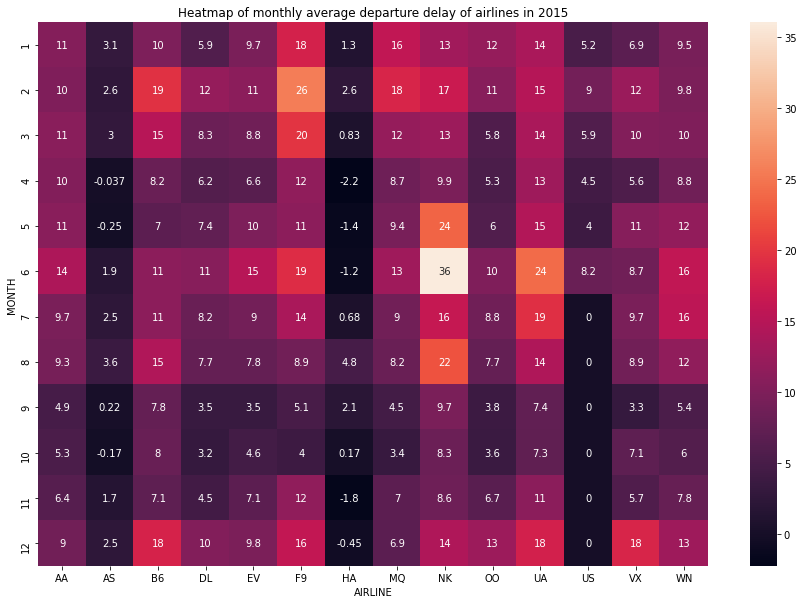

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title("Heatmap of monthly average departure delay of airlines in 2015")
sns.heatmap(data=df,annot=True)
plt.xlabel("AIRLINE")

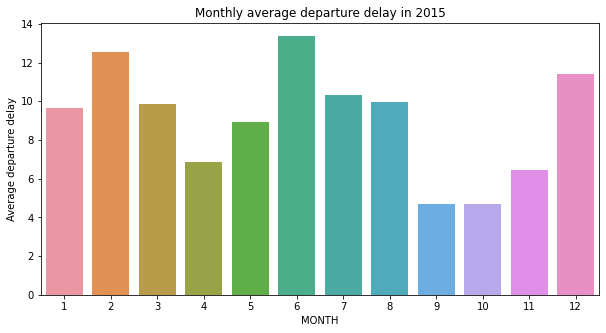

In [0]:
df['Average departure delay']=[ row.AA+row.AS+row.B6+row.DL+row.EV+row.F9+row.HA+row.MQ+row.NK+row.OO+row.UA+row.US+row.VX+row.WN for index, row in df.iterrows() ]
df['Average departure delay'][:6]=df['Average departure delay'][:6]/len(cols)
df['Average departure delay'][6:]=df['Average departure delay'][6:]/(len(cols)-1)
df=df.reset_index()
plt.figure(figsize=(10,5))
plt.title("Monthly average departure delay in 2015")
sns.barplot(x=df.MONTH,y=df['Average departure delay'])

Text(0, 0.5, 'Average departure delay')

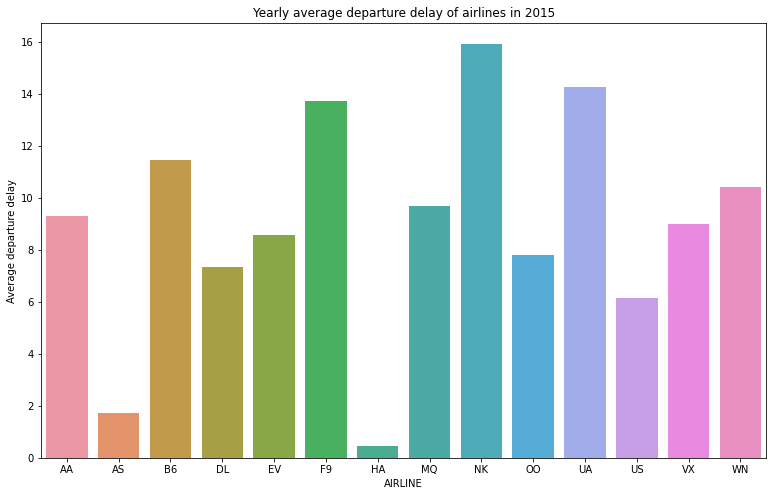

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.title("Yearly average departure delay of airlines in 2015")
sns.barplot(x=list(mean_dic.keys()),y=list(mean_dic.values()))
plt.xlabel("AIRLINE")
plt.ylabel("Average departure delay")

Text(0, 0.5, 'Average departure delay')

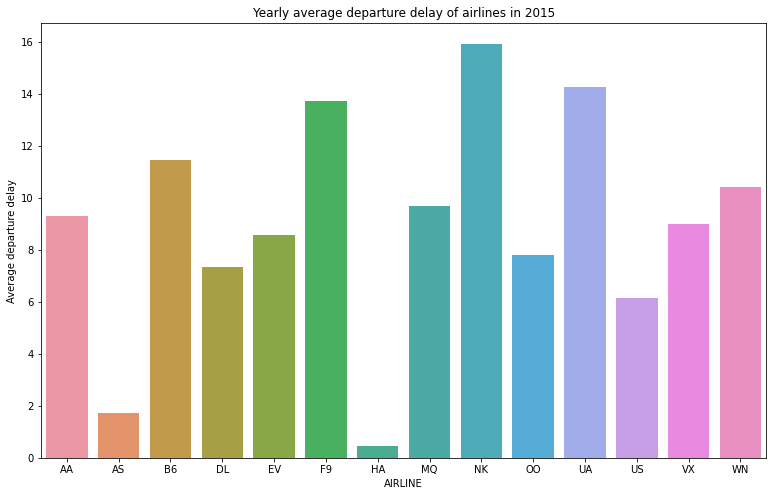

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.title("Yearly average departure delay of airlines in 2015")
sns.barplot(x=list(mean_dic.keys()),y=list(mean_dic.values()))
plt.xlabel("AIRLINE")
plt.ylabel("Average departure delay")

In [0]:
data[data['AIRLINE']=='US']

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
7,7,2015,1,1,4,US,LAX,CLT,30,44.0,14.0,803,753.0,-10.0,273.0,249.0,13.0,57.0,2125,0,228.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
28,28,2015,1,1,4,US,LAS,CLT,120,110.0,-10.0,825,754.0,-31.0,245.0,224.0,12.0,122.0,1916,0,205.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
35,36,2015,1,1,4,US,ANC,PHX,152,143.0,-9.0,915,905.0,-10.0,323.0,322.0,21.0,204.0,2552,0,298.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
44,46,2015,1,1,4,US,PHX,CLT,220,209.0,-11.0,804,728.0,-36.0,224.0,199.0,10.0,219.0,1773,0,183.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818527,2889484,2015,6,30,2,US,SLC,PHL,2355,2.0,7.0,616,612.0,-4.0,261.0,250.0,23.0,25.0,1927,0,225.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2818528,2889485,2015,6,30,2,US,PHX,STL,2355,7.0,12.0,447,531.0,44.0,172.0,204.0,19.0,26.0,1262,0,179.0,32.0,0.0,12.0,0.0,0.0,0,0,0,0,0
2818543,2889502,2015,6,30,2,US,PHX,ORD,2359,2356.0,-3.0,525,530.0,5.0,206.0,214.0,21.0,17.0,1440,0,185.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2818544,2889503,2015,6,30,2,US,PHX,BOS,2359,8.0,9.0,753,853.0,60.0,294.0,345.0,21.0,29.0,2300,0,314.0,51.0,0.0,3.0,6.0,0.0,0,0,0,0,0


In [0]:
samp=data[['MONTH','AIRLINE','ARRIVAL_DELAY']]
samp

,MONTH,AIRLINE,ARRIVAL_DELAY
0,1,AS,-22.0
1,1,AA,-9.0
2,1,US,5.0
3,1,AA,-9.0
4,1,AS,-21.0
...,...,...,...
5714003,12,B6,-26.0
5714004,12,B6,-16.0
5714005,12,B6,-8.0
5714006,12,B6,-10.0


In [0]:
import pandas as pd

df=samp.groupby(['MONTH','AIRLINE']).mean()
df=df.reset_index()
df=df.join(pd.get_dummies(df.AIRLINE))
df.drop('AIRLINE',inplace=True,axis=1)
cols=(df.columns).drop(['MONTH','ARRIVAL_DELAY'])
for col in cols:
  df[col]=df.ARRIVAL_DELAY*df[col]
df=df.drop('ARRIVAL_DELAY',axis=1)
df=df.groupby('MONTH').sum()
df

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
MONTH,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,0.000000,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,0.000000,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,0.000000,0.070998,-1.336260


In [0]:
mean_dic={}
cols=df.columns
for col in cols:
  mean_dic[col]=df[col].mean()
print(mean_dic)
mean_dic['US']=mean_dic['US']*2
print(mean_dic)

{'AA': 4.120775518432555, 'AS': -1.0236559856064695, 'B6': 6.788370351904774, 'DL': 0.23111640348416998, 'EV': 6.543328372409866, 'F9': 13.035736141135194, 'HA': 1.9932048748540492, 'MQ': 5.964953135629869, 'NK': 14.549662625599334, 'OO': 5.909657667177292, 'UA': 5.4134149243039404, 'US': 1.8884075012135921, 'VX': 4.717718456228451, 'WN': 4.275277017946606}
{'AA': 4.120775518432555, 'AS': -1.0236559856064695, 'B6': 6.788370351904774, 'DL': 0.23111640348416998, 'EV': 6.543328372409866, 'F9': 13.035736141135194, 'HA': 1.9932048748540492, 'MQ': 5.964953135629869, 'NK': 14.549662625599334, 'OO': 5.909657667177292, 'UA': 5.4134149243039404, 'US': 3.7768150024271843, 'VX': 4.717718456228451, 'WN': 4.275277017946606}


Text(0.5, 69.0, 'AIRLINE')

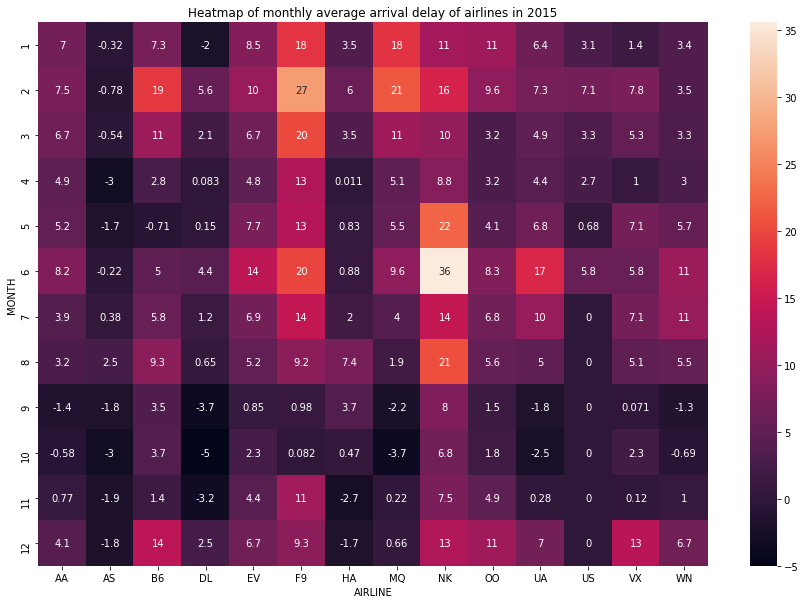

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title("Heatmap of monthly average arrival delay of airlines in 2015")
sns.heatmap(data=df,annot=True)
plt.xlabel("AIRLINE")

Text(0, 0.5, 'Average arrival delay')

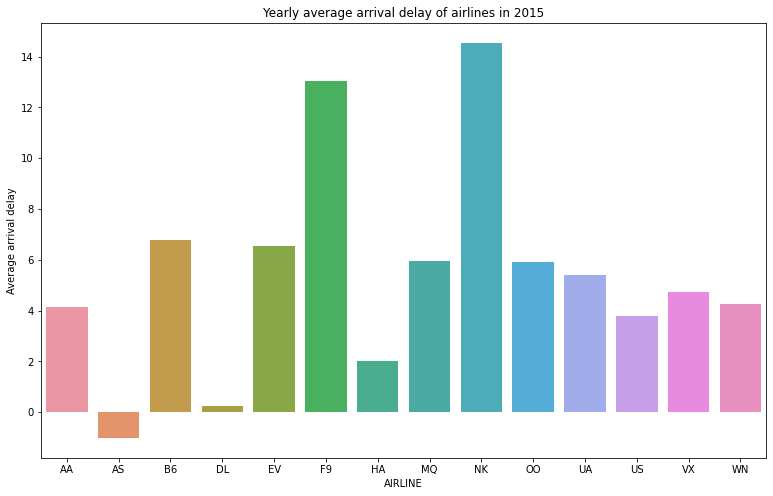

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.title("Yearly average arrival delay of airlines in 2015")
sns.barplot(x=list(mean_dic.keys()),y=list(mean_dic.values()))
plt.xlabel("AIRLINE")
plt.ylabel("Average arrival delay")

In [0]:
df=data[['DAY_OF_WEEK','DEPARTURE_DELAY']]
df

,DAY_OF_WEEK,DEPARTURE_DELAY
0,4,-11.0
1,4,-8.0
2,4,-2.0
3,4,-5.0
4,4,-1.0
...,...,...
5714003,4,-4.0
5714004,4,-4.0
5714005,4,-9.0
5714006,4,-6.0


In [0]:
df=df.groupby('DAY_OF_WEEK').mean()
df=df.reset_index()
df

,DAY_OF_WEEK,DEPARTURE_DELAY
0,1,10.755533
1,2,9.104848
2,3,8.597665
3,4,9.875447
4,5,9.373953
5,6,7.734828
6,7,9.327305


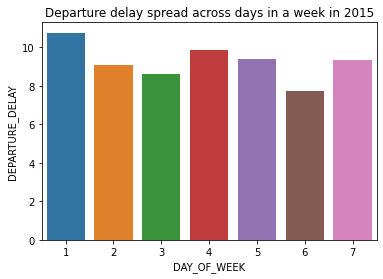

In [0]:
plt.title("Departure delay spread across days in a week in 2015")
sns.barplot(df.DAY_OF_WEEK,df.DEPARTURE_DELAY)

In [0]:
df=data[['DAY_OF_WEEK','ARRIVAL_DELAY']]
df

,DAY_OF_WEEK,ARRIVAL_DELAY
0,4,-22.0
1,4,-9.0
2,4,5.0
3,4,-9.0
4,4,-21.0
...,...,...
5714003,4,-26.0
5714004,4,-16.0
5714005,4,-8.0
5714006,4,-10.0


In [0]:
df=df.groupby('DAY_OF_WEEK').mean()
df=df.reset_index()
df

,DAY_OF_WEEK,ARRIVAL_DELAY
0,1,6.002063
1,2,4.246041
2,3,3.845468
3,4,5.668334
4,5,4.764079
5,6,1.852892
6,7,3.958293


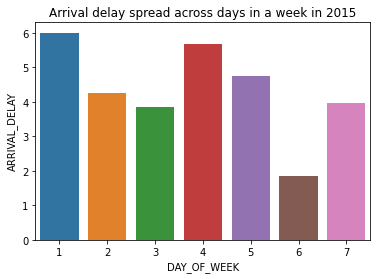

In [0]:
plt.title("Arrival delay spread across days in a week in 2015")
sns.barplot(df.DAY_OF_WEEK,df.ARRIVAL_DELAY)

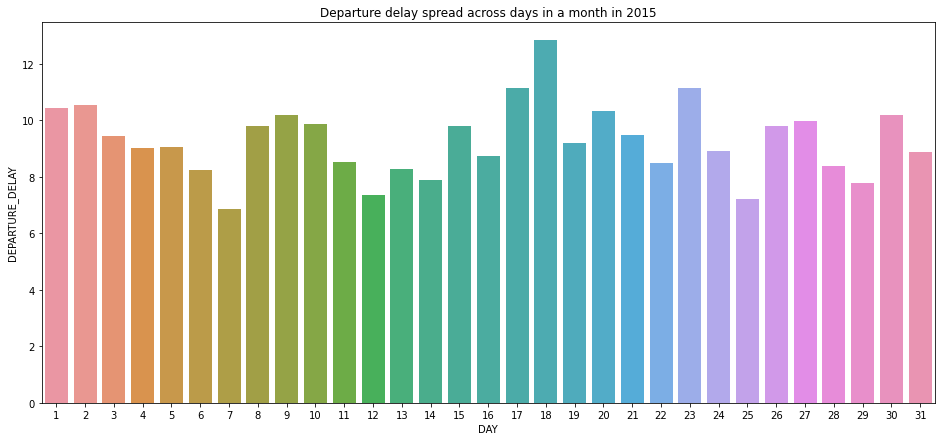

In [0]:
df=data[['DAY','DEPARTURE_DELAY']]
df=df.groupby('DAY').mean()
df=df.reset_index()
plt.figure(figsize=(16,7))
plt.title("Departure delay spread across days in a month in 2015")
sns.barplot(df.DAY,df.DEPARTURE_DELAY)

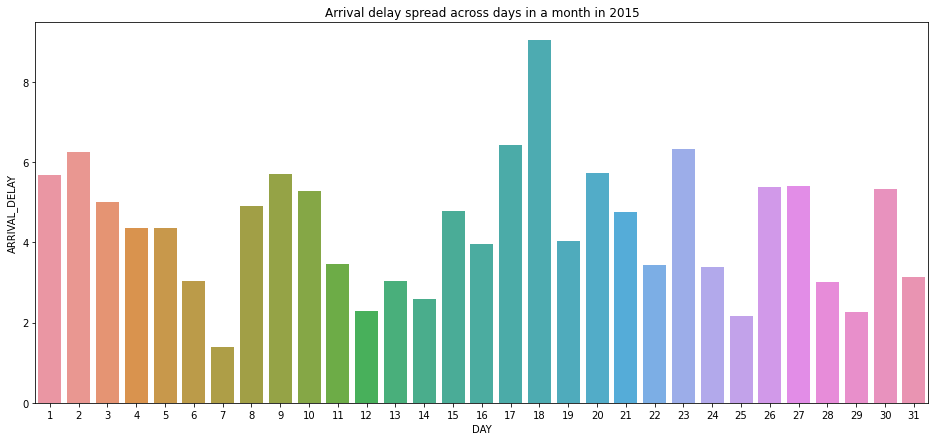

In [0]:
df=data[['DAY','ARRIVAL_DELAY']]
df=df.groupby('DAY').mean()
df=df.reset_index()
plt.figure(figsize=(16,7))
plt.title("Arrival delay spread across days in a month in 2015")
sns.barplot(df.DAY,df.ARRIVAL_DELAY)

In [0]:
import pandas as pd

traindata=pd.read_csv('/content/drive/My Drive/train_data.csv')
testdata=pd.read_csv('/content/drive/My Drive/test_data.csv')

In [11]:
traindata[:4285506]

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015.0,4.0,11.0,6.0,0.308508,0.341235,0.082088,9.0,80.0,337.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1226.0,1219.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,15.0,16.0,25.0,30.0,50.0,15.0,34.0,1.0,1.0,1.0,1.0,1.0,0
1,2015.0,7.0,10.0,5.0,0.304283,0.294836,0.130962,7.0,85.0,480.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,1309.0,1302.0,4446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,14.0,16.0,44.0,45.0,10.0,14.0,51.0,1.0,1.0,1.0,1.0,1.0,0
2,2015.0,5.0,21.0,4.0,0.257698,0.238668,0.998464,7.0,90.0,425.0,62.0,0.0,0.0,0.0,0.0,43.0,0.0,1282.0,1232.0,3175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,12.0,14.0,13.0,20.0,50.0,13.0,20.0,0.0,0.0,0.0,0.0,0.0,1
3,2015.0,11.0,13.0,5.0,0.282126,0.305712,0.070847,15.0,306.0,2370.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,69.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,16.0,27.0,35.0,41.0,8.0,42.0,1.0,1.0,1.0,1.0,1.0,0
4,2015.0,8.0,14.0,5.0,0.316538,0.238668,0.076309,13.0,120.0,545.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,343.0,237.0,3545.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,17.0,3.0,10.0,10.0,15.0,16.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285501,2015.0,11.0,13.0,5.0,0.308508,0.295183,0.255993,32.0,91.0,421.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.0,986.0,4252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,19.0,20.0,10.0,6.0,37.0,19.0,42.0,1.0,1.0,1.0,1.0,1.0,1
4285502,2015.0,10.0,6.0,2.0,0.276684,0.340097,0.130962,9.0,170.0,1092.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,1257.0,1268.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,19.0,22.0,14.0,15.0,5.0,19.0,23.0,1.0,1.0,1.0,1.0,1.0,0
4285503,2015.0,8.0,22.0,6.0,0.254685,0.300638,0.082088,13.0,136.0,821.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,397.0,524.0,229.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,13.0,50.0,55.0,11.0,12.0,3.0,1.0,1.0,1.0,1.0,1.0,0
4285504,2015.0,2.0,8.0,7.0,0.298798,0.341235,0.070847,26.0,163.0,954.0,144.0,0.0,15.0,0.0,0.0,0.0,0.0,1005.0,935.0,4154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,12.0,15.0,47.0,55.0,38.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
testdata

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
1,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
2,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
3,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
4,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
1428431,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1428432,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
1428433,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [12]:
dataset=pd.concat([traindata[:4285506],testdata])
dataset.drop('OUTCOME',axis=1,inplace=True)
dataset

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.0,11.0,6.0,0.308508,0.341235,0.082088,9.0,80.0,337.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1226.0,1219.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,15.0,16.0,25.0,30.0,50.0,15.0,34.0,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.0,10.0,5.0,0.304283,0.294836,0.130962,7.0,85.0,480.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,1309.0,1302.0,4446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,14.0,16.0,44.0,45.0,10.0,14.0,51.0,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.0,21.0,4.0,0.257698,0.238668,0.998464,7.0,90.0,425.0,62.0,0.0,0.0,0.0,0.0,43.0,0.0,1282.0,1232.0,3175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,12.0,14.0,13.0,20.0,50.0,13.0,20.0,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.0,13.0,5.0,0.282126,0.305712,0.070847,15.0,306.0,2370.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,69.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,16.0,27.0,35.0,41.0,8.0,42.0,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.0,14.0,5.0,0.316538,0.238668,0.076309,13.0,120.0,545.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,343.0,237.0,3545.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,17.0,3.0,10.0,10.0,15.0,16.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015.0,11.0,22.0,7.0,0.308508,0.284717,1.000000,13.0,212.0,1464.0,167.0,0.0,0.0,0.0,0.0,68.0,0.0,85.0,21.0,4210.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,11.0,17.0,49.0,30.0,2.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0
1428431,2015.0,10.0,23.0,5.0,0.201649,0.238668,0.975365,50.0,133.0,813.0,99.0,0.0,23.0,0.0,14.0,20.0,0.0,250.0,237.0,547.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,17.0,55.0,21.0,34.0,15.0,45.0,0.0,0.0,0.0,0.0,0.0
1428432,2015.0,4.0,29.0,3.0,0.318843,0.288808,0.099772,9.0,69.0,255.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,1159.0,1183.0,2431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,16.0,17.0,32.0,35.0,44.0,16.0,41.0,1.0,1.0,1.0,1.0,1.0
1428433,2015.0,12.0,31.0,4.0,0.282422,0.358423,0.063157,10.0,132.0,764.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,495.0,432.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,16.0,25.0,35.0,47.0,13.0,35.0,1.0,1.0,1.0,1.0,1.0


                     DEPARTURE_DELAY
DEPARTURE_TIME_HOUR                 
0.0                         0.532794
1.0                         0.565367
2.0                         0.640399
3.0                         0.534667
4.0                         0.109507
5.0                         0.113052
6.0                         0.150714
7.0                         0.182666
8.0                         0.204693
9.0                         0.236201
10.0                        0.250492
11.0                        0.271128
12.0                        0.284690
13.0                        0.293482
14.0                        0.322868
15.0                        0.322603
16.0                        0.336896
17.0                        0.334216
18.0                        0.370818
19.0                        0.372920
20.0                        0.416504
21.0                        0.423778
22.0                        0.473385
23.0                        0.525279


Text(0, 0.5, 'Average departure delay')

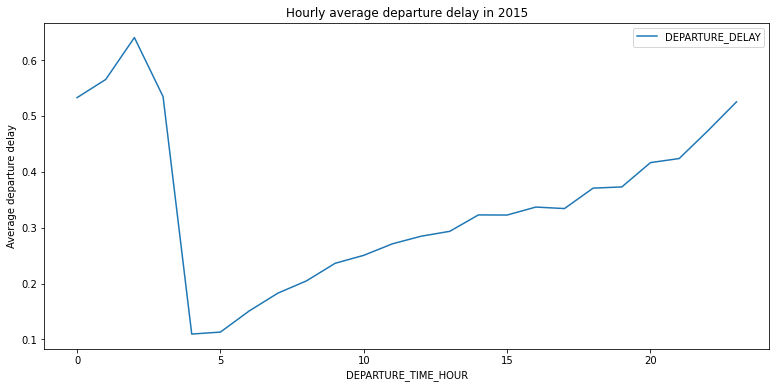

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

data=dataset[['DEPARTURE_DELAY','DEPARTURE_TIME_HOUR']]
data=data.groupby('DEPARTURE_TIME_HOUR').mean()
print(data)
plt.figure(figsize=(13,6))
plt.title("Hourly average departure delay in 2015")-




---8;xblv                                                 

4
sns.lineplot(data=data)
plt.ylabel("Average departure delay")

In [0]:
pearsonCorr=dataset.corr(method='pearson')
pearsonCorr

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.020392,-0.008659,-0.005221,-0.011050,-0.043253,-0.017457,0.010765,0.011326,0.003654,NaN,-0.019188,0.002658,-0.009055,-0.017812,-0.009612,-0.069960,-0.069996,0.000678,0.088111,0.007437,0.007239,0.011663,-0.018030,0.003703,-0.002396,-0.037237,0.009272,0.000918,0.004906,-0.168570,0.008385,0.010123,-0.006420,-0.001461,-0.012419,-0.000548,-0.000115,0.006327,-0.007403,-0.000401,0.048611,0.048611,0.048611,0.048611,0.048611
DAY,NaN,0.020392,1.000000,0.004713,-0.000306,-0.000889,-0.007842,-0.003106,0.002298,0.002505,0.001302,NaN,-0.007587,-0.000696,0.000688,0.000649,0.004276,-0.000717,-0.000703,0.001026,0.000691,0.001034,0.001335,0.001139,-0.001685,0.000057,-0.000632,-0.002757,0.001256,0.000297,-0.002044,-0.002364,0.000177,0.001938,-0.003364,-0.002035,-0.005080,-0.000031,0.000252,0.001074,-0.004180,0.000204,0.009280,0.009280,0.009280,0.009280,0.009280
DAY_OF_WEEK,NaN,-0.008659,0.004713,1.000000,0.000286,0.000725,-0.011412,-0.022468,0.014990,0.016883,0.014965,NaN,-0.018730,0.000476,0.000750,-0.015959,-0.005741,-0.005918,-0.005973,0.005627,0.005922,0.006208,0.007407,-0.005460,-0.006833,0.002924,0.007072,-0.000422,0.007343,0.001295,-0.006365,0.002743,-0.000159,-0.004449,0.005187,0.008215,0.006452,-0.000275,0.000857,0.000487,0.003445,-0.000373,0.016243,0.016243,0.016243,0.016243,0.016243
ORIGIN_AIRPORT,NaN,-0.005221,-0.000306,0.000286,1.000000,0.108827,0.098457,0.114058,0.110020,0.109246,0.104128,NaN,0.019140,0.007887,0.023819,0.027407,0.010648,0.084763,0.082910,0.015115,0.142203,-0.043881,-0.009933,-0.233390,-0.027185,0.036671,-0.154515,0.045101,0.036902,-0.064293,0.116285,0.056930,0.059093,0.047920,0.057827,0.056934,0.069171,-0.001706,-0.007708,0.006364,0.057219,0.009580,-0.078642,-0.078642,-0.078642,-0.078642,-0.078642
DESTINATION_AIRPORT,NaN,-0.011050,-0.000889,0.000725,0.108827,1.000000,0.068277,0.046671,0.125494,0.124701,0.125351,NaN,0.062437,0.004033,0.010084,0.020897,0.003916,0.025384,0.043869,-0.039798,0.069720,-0.027071,0.116723,-0.215592,0.006320,0.011895,-0.039868,0.044075,0.034822,-0.032312,0.100192,0.002799,0.070248,-0.018798,0.050999,0.053385,0.025188,0.002018,0.007451,0.006359,0.048979,0.000575,-0.071253,-0.071253,-0.071253,-0.071253,-0.071253
DEPARTURE_DELAY,NaN,-0.043253,-0.007842,-0.011412,0.098457,0.068277,1.000000,0.022401,0.022909,0.022391,0.016325,NaN,0.205983,0.026815,0.328851,0.446758,0.120703,0.078877,0.080801,-0.010664,-0.021677,-0.052086,0.020866,-0.052334,-0.023552,0.012460,-0.042521,0.006451,0.036375,-0.030415,0.059823,-0.027752,-0.001586,0.074003,0.284344,0.221725,0.188128,-0.039674,0.031465,0.003808,0.274315,0.035236,-0.757595,-0.757595,-0.757595,-0.757595,-0.757595
TAXI_OUT,NaN,-0.017457,-0.003106,-0.022468,0.114058,0.046671,0.022401,1.000000,0.101493,0.060287,0.078066,NaN,0.349049,0.002794,0.020802,0.003221,0.075165,-0.163605,-0.160607,-0.042342,0.069834,-0.021593,0.045079,0.074105,0.030360,-0.004497,-0.065719,0.016863,-0.026878,0.078150,0.044748,0.065666,-0.015464,-0.247659,0.002004,-0.003901,0.015970,0.005009,-0.006912,0.010490,0.030370,0.007620,-0.236696,-0.236696,-0.236696,-0.236696,-0.236696
SCHEDULED_TIME,NaN,0.010765,0.002298,0.014990,0.110020,0.125494,

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title("Heatmap of monthly average arrival delay of airlines")
sns.heatmap(data=dataset,annot=True)
plt.xlabel("AIRLINE")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f181ebf2730> (for post_execute):


KeyboardInterrupt: ignored